In [1]:
#there is a training csv file with labeled transactions
#These labeled transactions are used to label other transactions and printed
#if everything checks out, these labeled transactions would be saved to labeledTransactions
#The file works on labeledTransactions as a whole after this

#copyright: Ekansh Gupta (ekanshgupta340@gmail.com)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from os import listdir
from os.path import isfile, join
import re
import helper

,date,name,value,type,subtype,ownership,comments
0,12/14/2024,E-VISA TURKEY ANKARA TR,200.91,vacation,visa,,
1,12/09/2024,DELTA AIR 0062288201720800-2211212 CA,729.15,vacation,flight,,
2,12/08/2024,DELTA AIR 0062288847868800-2211212 CA,852.15,vacation,flight,,
3,09/26/2024,UBER *TRIP HELP.UBER.COMCA,10.93,transport,misc,,
4,09/25/2024,UBER *TRIP HELP.UBER.COMCA,25.10,transport,misc,,
5,12/28/2024,AplPay PUBLIX ATLANTA GA,67.17,food,groceries,,
6,12/27/2024,HLU*HULUPLUS HULU.COM/BILL CA,10.99,subscription,streaming,,
7,12/24/2024,AplPay PUBLIX ATLANTA GA,12.94,food,groceries,,
8,12/21/2024,AplPay PUBLIX ATLANTA GA,63.37,food,groceries,,
9,12/21/2024,WORLD MARKET #126 0DUNWOODY GA,19.71,food,groceries,,


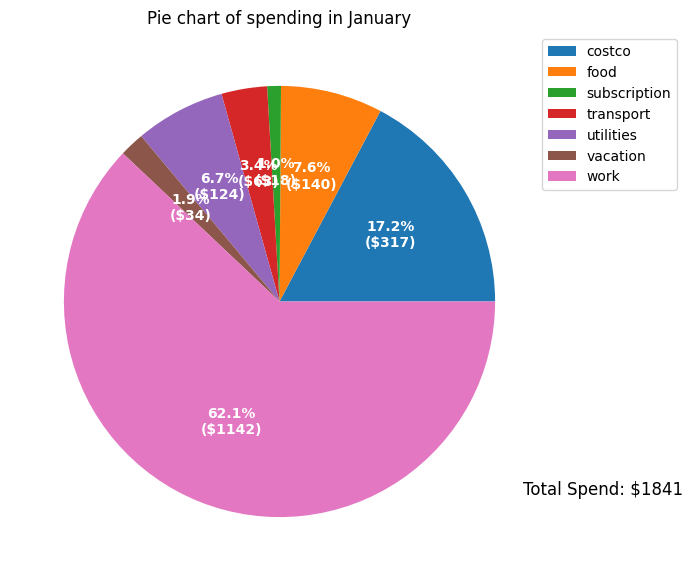

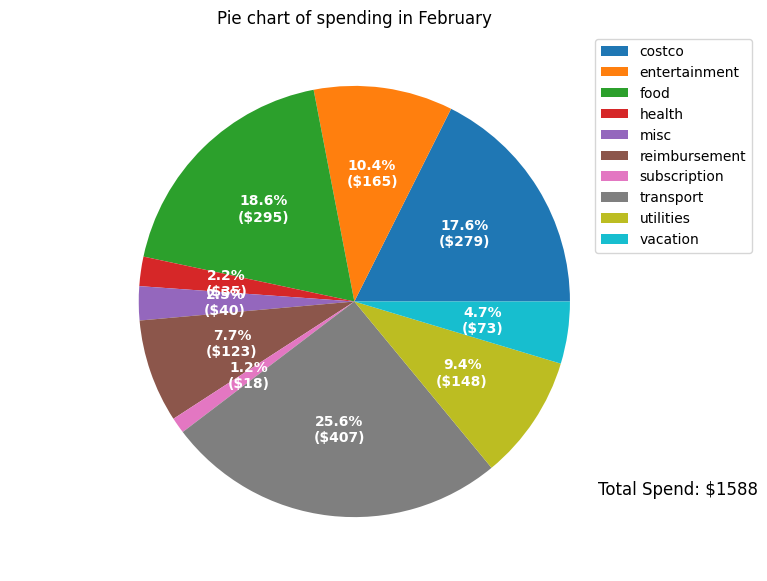

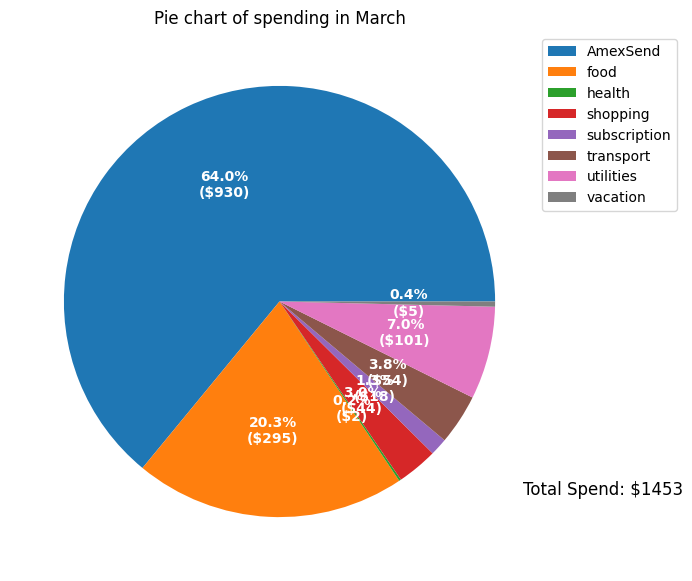

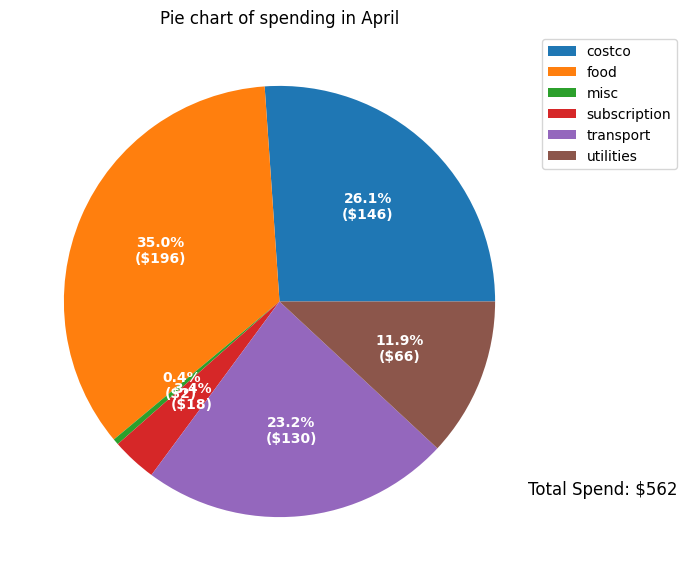

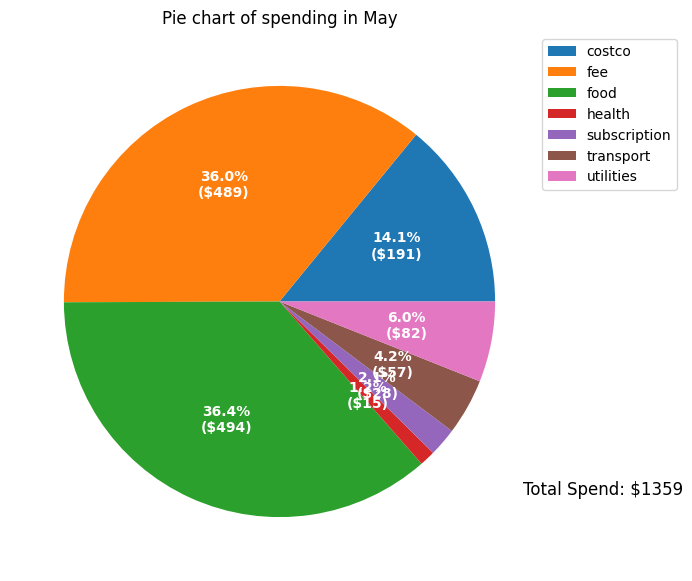

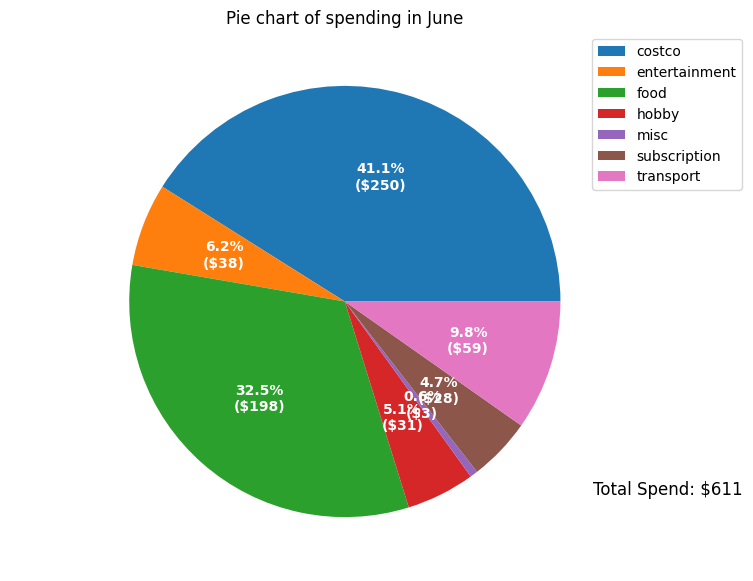

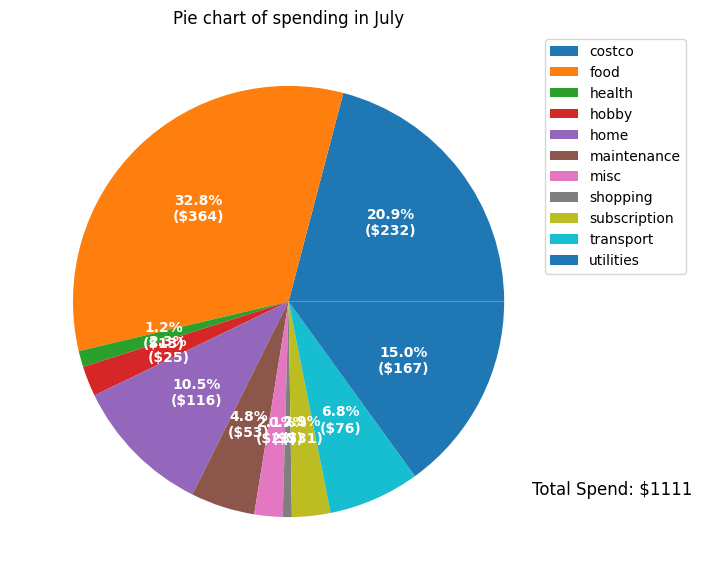

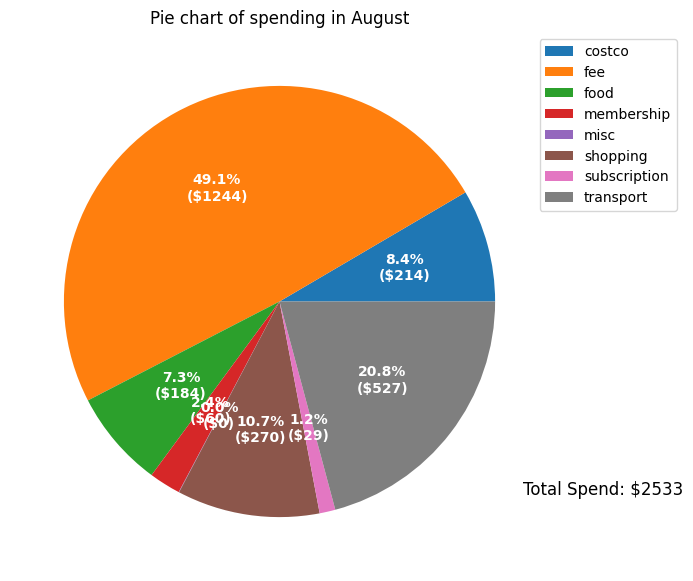

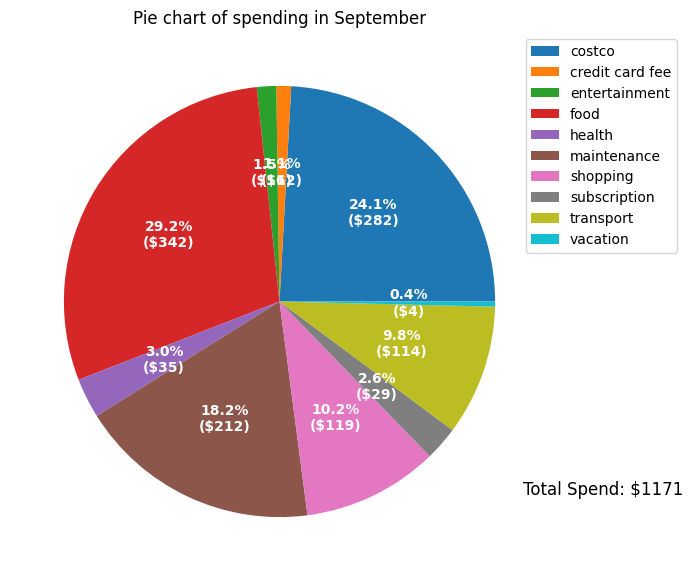

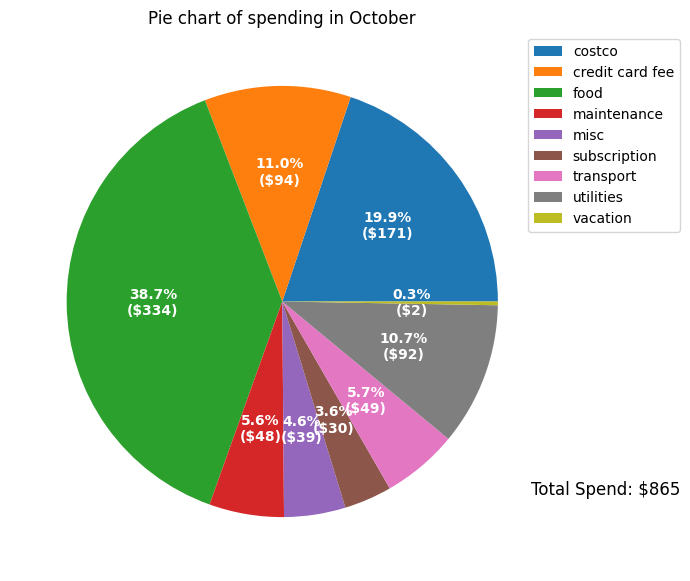

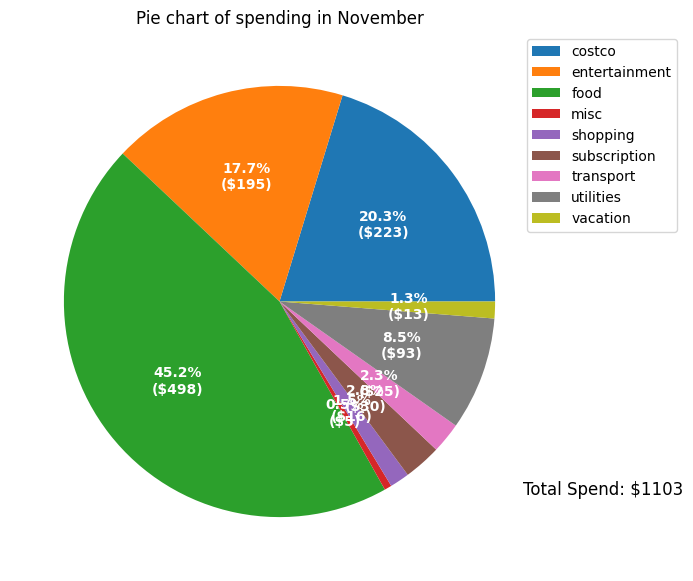

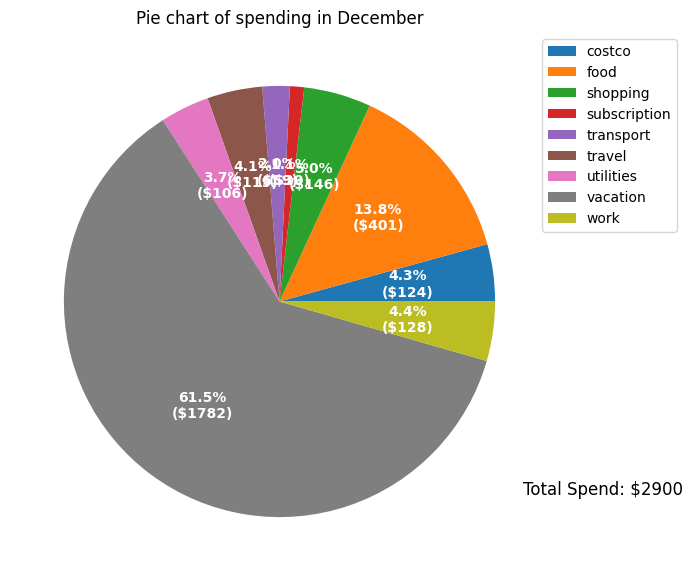

In [2]:
folder="Transactions/"

df = helper.labelTransactions(folder)
#The above should be commented out and should only be called when new unlabeled transactions are added

# helper.addNewLabelsToTraining(folder, df)
#The above should be commented out and should only be called when training data is to be updated

df = helper.loadLabeledTransactions(folder)
df[['month', 'day', 'year']] = df['date'].str.split('/', expand=True)
catList = ['dine-in', 'takeout','groceries-me','groceries-common','rent','utilities','total','dineout','food']
typeList = ['food','house','utilities','vacation','transport','health','misc','entertainment','shopping'\
           'costco','reimbursement','AmexSend','subscription']
subTypeList = ['groceries','dine-in','takeout','rent','utilities','misc','parking','mail',\
              'taxi','flight','streaming','hotel','license','parking','insurance','gym']
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['year'] = df['year'].astype(int)

summaryDict={}
summaryDict['month']=[]
summaryDict['budget']=[]
for cat in catList:    
    summaryDict[cat]=[]
#each key is a column so keys should be 'month', 'food', etc and each key will point to a list
df=df[df['year']==2024]
for i in range(12):
    month = i+1
    month_df = df[df['month']==month]
    #each month index will have a dict containing the summary statistics
    if month_df.empty:
        continue
    summaryDict['month'].append(calendar.month_name[month])
#     summaryDict['budget'].append(getBudget(month))
    monthTypeDf = month_df[['type','value']]
    monthTypeDf = monthTypeDf.groupby(['type']).sum()
    plot = monthTypeDf.plot.pie(y='value', figsize=(9, 7), 
                                autopct=lambda pct: helper.func(pct, monthTypeDf['value']),
                                  textprops=dict(color="w",weight='bold'))
    plot.set_title("Pie chart of spending in "+str(calendar.month_name[month]))
    plot.set_ylabel(None)
    plot.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0))
    totalSpend = monthTypeDf['value'].sum()
    plt.annotate(f'Total Spend: ${"{:.0f}".format(totalSpend)}', xy=(1.1, 0.15),
             xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='center', fontsize=12, color='black')
    

# summaryDf = pd.DataFrame(summaryDict)
# print(summaryDf)

# fig = plt.figure(figsize=(10,9))
# ax = plt.gca()
# ax1 = summaryDf[['month','groceries-me','groceries-common','dineout']].plot.bar(x='month',stacked=True, 
#ax=ax)
# ax2 = summaryDf.plot.line(x='month',y='total',ax=ax1, marker = 'D')
# ax3 = summaryDf.plot.line(x='month',y='budget',ax=ax2,linestyle='dashed', marker = 'o')
# ax4 = summaryDf.plot.line(x='month',y='food',ax=ax3,linestyle='None', marker = '.',color='black')
# ax1.bar_label(ax1.containers[0], label_type='center', color='white')
# ax1.bar_label(ax1.containers[1], label_type='center', color='white')
# ax1.bar_label(ax1.containers[2], label_type='center', color='white')

# for idx, (month, total) in summaryDf[['month','total']].iterrows():
#     plt.annotate(f'{total}\n\n\n', xy=(idx, total), ha='center', va='center')
# for idx, (month, total) in summaryDf[['month','food']].iterrows():
#     plt.annotate(f'{total}\n\n', xy=(idx, total), ha='center', va='center')
